In [1]:
import numpy as np
import h5py
import halotools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = 'diemerL0500', version_name = 'antonio',redshift = 0, \
                            halo_finder = 'rockstar',ptcl_version_name='antonioz0')

In [3]:
mask = np.logical_and(halocat.halo_table['halo_mvir']>1e15,halocat.halo_table['halo_upid']==-1)

In [4]:
halo_x = halocat.halo_table['halo_x'][mask]
halo_y = halocat.halo_table['halo_y'][mask]
halo_z = halocat.halo_table['halo_z'][mask]

center = np.zeros((len(halo_x),3))

center[:,0] = halo_x
center[:,1] = halo_y
center[:,2] = halo_z

In [5]:
center.shape

(36, 3)

In [7]:
with h5py.File('/home/kuw8/.astropy/cache/halotools/particle_catalogs/diemerL0500/hlist_1.00000.particles.antonioz0.hdf5', 'r') as f:
    ptcl_array = f['data'][()]
ptclpos = np.zeros((len(ptcl_array),3))
ptclpos[:,0] = ptcl_array['x']
ptclpos[:,1] = ptcl_array['y']
ptclpos[:,2] = ptcl_array['z']

In [8]:
ptclpos.shape

(107369756, 3)

In [9]:
from fast3tree import fast3tree, get_distance

def get_binned_profiles(particles_pos, halos_pos, bins, box_size):
    """
    Parameters
    ----------
    particles_pos : M-by-3 2d numpy array
    halos_pos : N-by-3 2d numpy array
    bins : sorted 1d array
    box_size : float
    
    Returns
    -------
    binned_profiles : N-by-len(bins) numpy array
    """
    assert (np.ediff1d(bins) > 0).all()
    max_r = bins[-1]
    nbins = len(bins)
    binned_profiles = []
    with fast3tree(particles_pos) as tree:
        tree.set_boundaries(0, box_size)
        for halo_pos in halos_pos:
            pos = tree.query_radius(halo_pos, max_r, True, 'pos')
            pos = get_distance(halo_pos, pos, box_size)
            pos = np.searchsorted(bins, pos, 'right')
            pos = np.bincount(pos, minlength=nbins)[:nbins]
            binned_profiles.append(pos)
            print '*'
    return np.array(binned_profiles)

In [10]:
binned_profiles = get_binned_profiles(ptclpos,center,np.linspace(0,3.5,350),500)

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


### binned_profiles contains dN/dr for each halo(not normalized)

In [11]:
binned_profiles.shape

(36, 350)

In [12]:
dndr = binned_profiles[:,1:]/(np.linspace(0,3.5,350)[1:]**2)

/home/kuw8/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


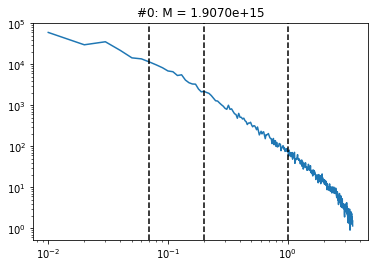

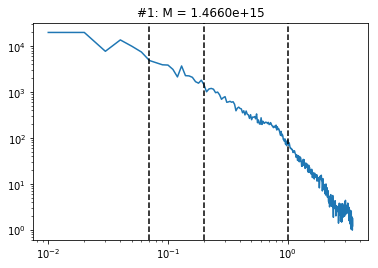

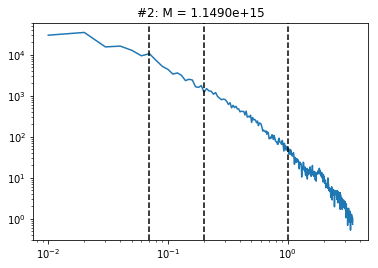

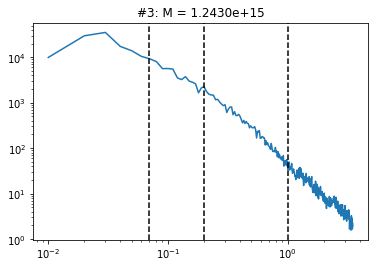

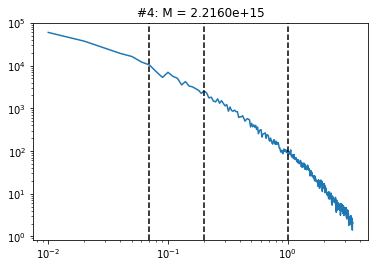

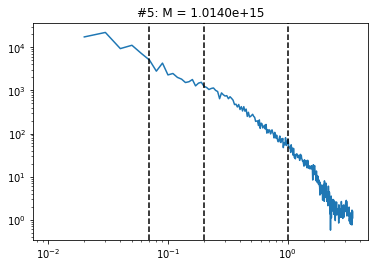

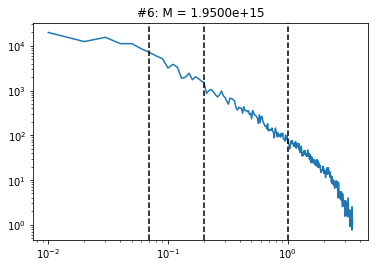

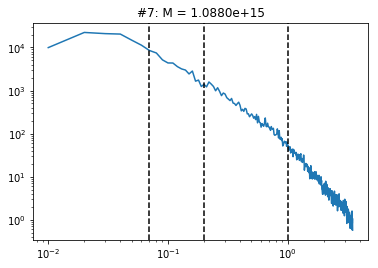

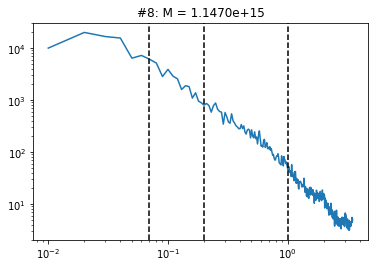

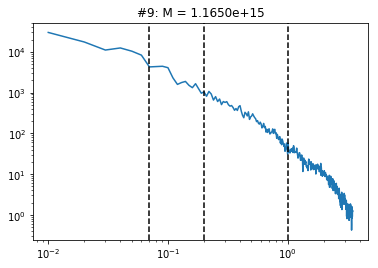

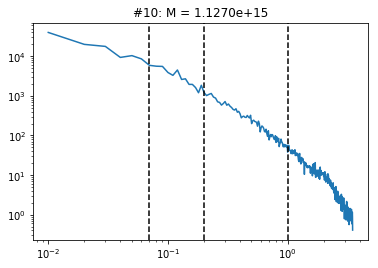

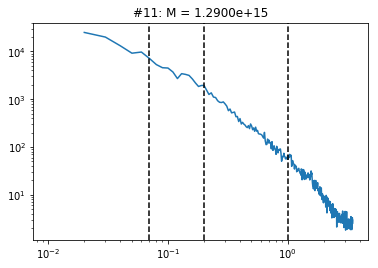

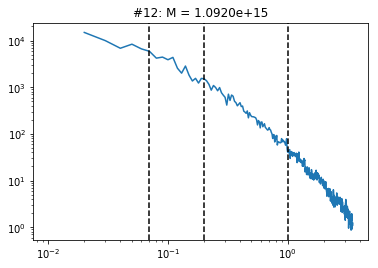

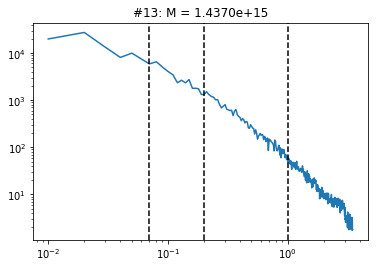

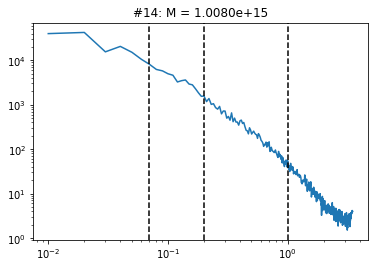

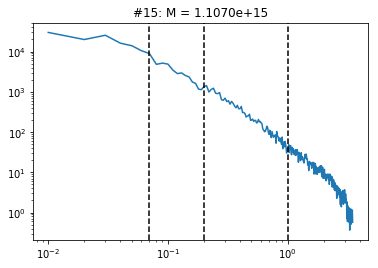

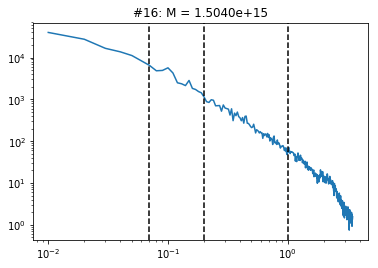

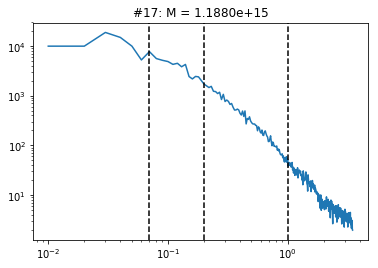

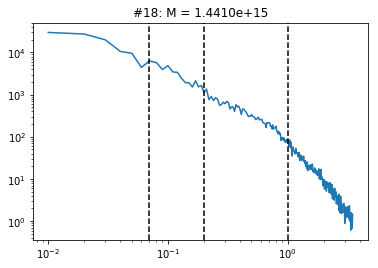

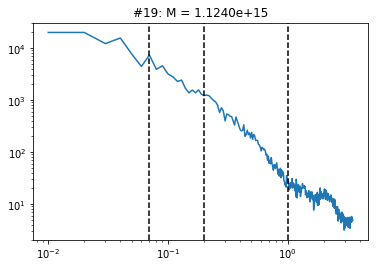

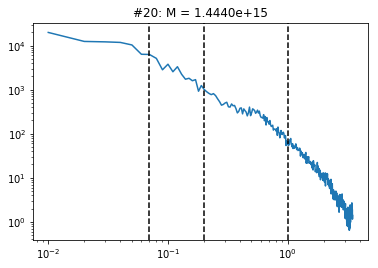

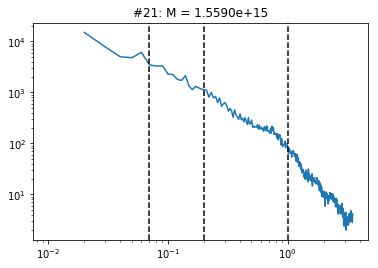

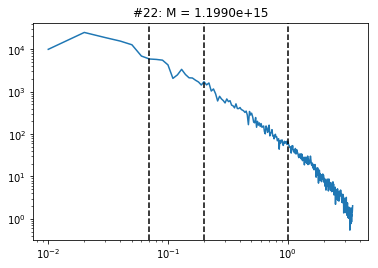

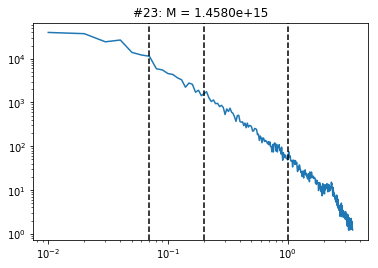

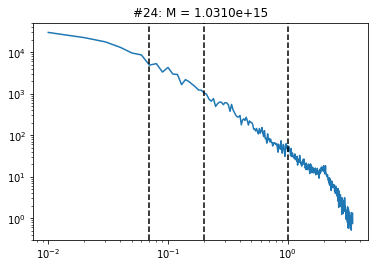

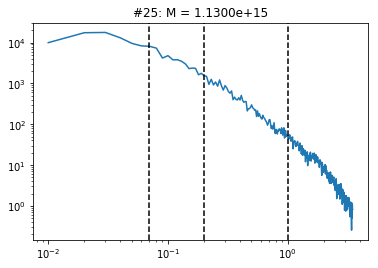

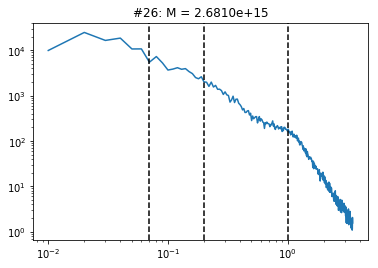

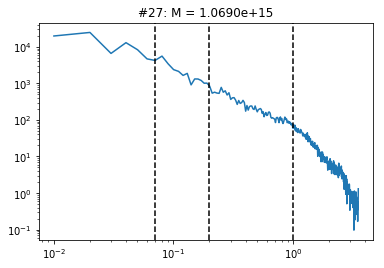

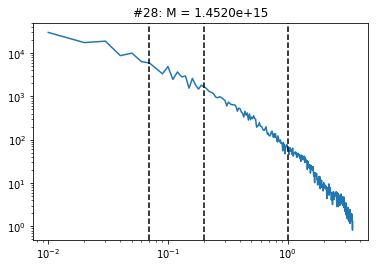

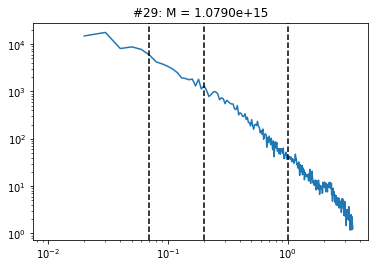

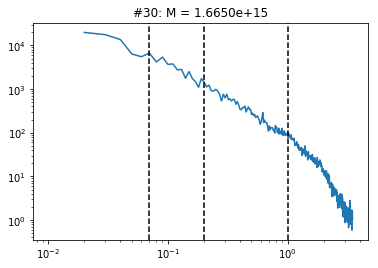

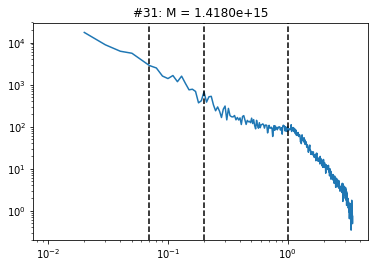

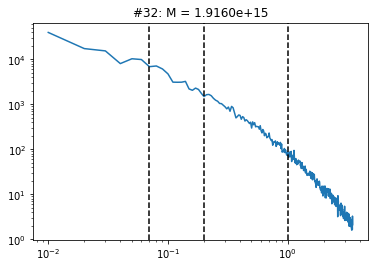

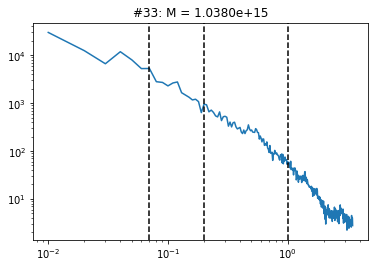

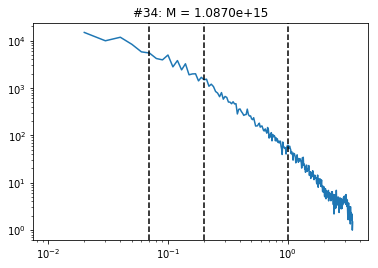

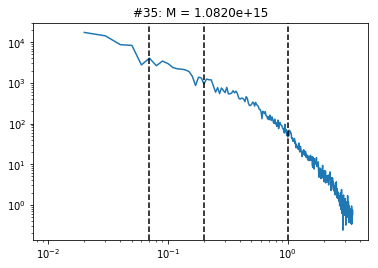

In [13]:
for i in range(36):
    plt.figure()
    plt.plot(np.linspace(0,3.5,350)[1:],dndr[i])
    plt.axvline(x=0.07,linestyle='--',color='k')
    plt.axvline(x=0.2,linestyle='--',color='k')
    plt.axvline(x=1,linestyle='--',color='k')
    plt.loglog()
    plt.title('#%i: M = %.4e'%(i,halocat.halo_table['halo_mvir'][mask][i]))

### M_ptcl = resolution\*downsampling factor = 8.7e9*10 = 8.7e10

In [14]:
print np.sort(np.array(halocat.halo_table['halo_rvir'][mask]))

[ 2.384053  2.388641  2.401972  2.407307  2.431171  2.439007  2.441209
  2.444803  2.44557   2.448525  2.459854  2.471877  2.474301  2.476795
  2.488767  2.490508  2.502046  2.518455  2.525919  2.556294  2.588179
  2.671375  2.683156  2.685792  2.687198  2.692333  2.69585   2.701162
  2.723897  2.757082  2.818055  2.948489  2.953235  2.970355  3.099656
  3.303048]


In [15]:
print np.sum(binned_profiles,axis=1)*8.7e10

[  1.72460100e+15   1.38730200e+15   1.11560100e+15   1.31857200e+15
   1.95497700e+15   9.84492000e+14   1.73660700e+15   1.08045300e+15
   1.33858200e+15   1.13595900e+15   1.08332400e+15   1.29395100e+15
   1.11281700e+15   1.45481400e+15   1.09298100e+15   1.09106700e+15
   1.38912900e+15   1.30091100e+15   1.32431400e+15   1.37503500e+15
   1.35972300e+15   1.56791400e+15   1.19738100e+15   1.37973300e+15
   1.04469600e+15   1.08019200e+15   2.29723500e+15   1.01154900e+15
   1.40470200e+15   1.16875800e+15   1.49779200e+15   1.36563900e+15
   1.77732300e+15   1.24079400e+15   1.17754500e+15   1.00137000e+15]


In [16]:
print np.array(halocat.halo_table['halo_mvir'][mask])

[  1.90700000e+15   1.46600000e+15   1.14900000e+15   1.24300000e+15
   2.21600000e+15   1.01400000e+15   1.95000000e+15   1.08800000e+15
   1.14700000e+15   1.16500000e+15   1.12700000e+15   1.29000000e+15
   1.09200000e+15   1.43700000e+15   1.00800000e+15   1.10700000e+15
   1.50400000e+15   1.18800000e+15   1.44100000e+15   1.12400000e+15
   1.44400000e+15   1.55900000e+15   1.19900000e+15   1.45800000e+15
   1.03100000e+15   1.13000000e+15   2.68100000e+15   1.06900000e+15
   1.45200000e+15   1.07900000e+15   1.66500000e+15   1.41800000e+15
   1.91600000e+15   1.03800000e+15   1.08700000e+15   1.08200000e+15]


In [17]:
print np.array(halocat.halo_table['halo_mvir'][mask])-np.sum(binned_profiles,axis=1)*8.7e10

[  1.82399000e+14   7.86980000e+13   3.33990000e+13  -7.55720000e+13
   2.61023000e+14   2.95080000e+13   2.13393000e+14   7.54700000e+12
  -1.91582000e+14   2.90410000e+13   4.36760000e+13  -3.95100000e+12
  -2.08170000e+13  -1.78140000e+13  -8.49810000e+13   1.59330000e+13
   1.14871000e+14  -1.12911000e+14   1.16686000e+14  -2.51035000e+14
   8.42770000e+13  -8.91400000e+12   1.61900000e+12   7.82670000e+13
  -1.36960000e+13   4.98080000e+13   3.83765000e+14   5.74510000e+13
   4.72980000e+13  -8.97580000e+13   1.67208000e+14   5.23610000e+13
   1.38677000e+14  -2.02794000e+14  -9.05450000e+13   8.06300000e+13]


In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
%matplotlib notebook

In [20]:
def pos_visual(particles_pos, halos_pos, r=3.5, box_size=500):
    with fast3tree(particles_pos) as tree:
        tree.set_boundaries(0, box_size)
        for halo_pos in halos_pos:
            pos = tree.query_radius(halo_pos, r, True, 'pos')
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            xs = pos[:,0]
            ys = pos[:,1]
            zs = pos[:,2]
            ax.scatter(xs, ys, zs, s=0.1)
            ax.plot([halo_pos[0],],[halo_pos[1],],[halo_pos[2],],'ro')

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
    return 0

<IPython.core.display.Javascript object>


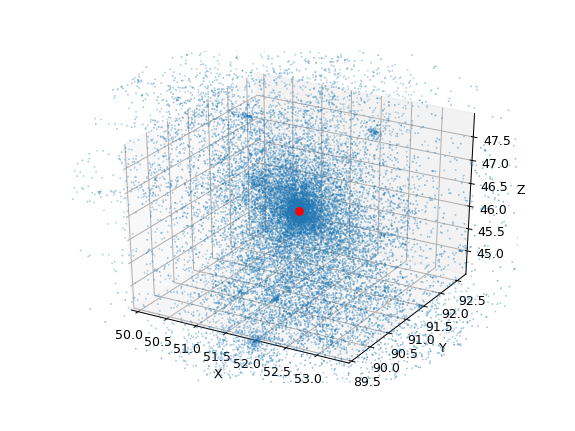

<IPython.core.display.Javascript object>


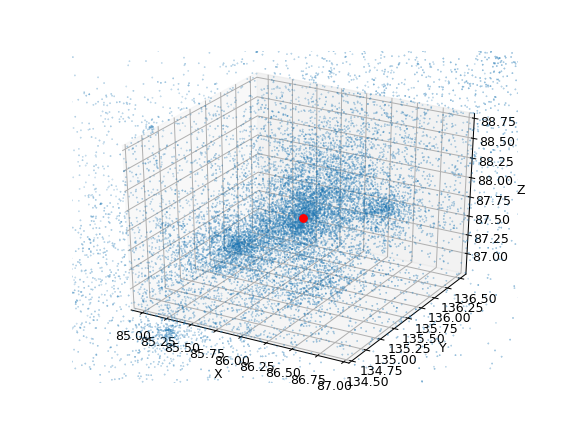

<IPython.core.display.Javascript object>


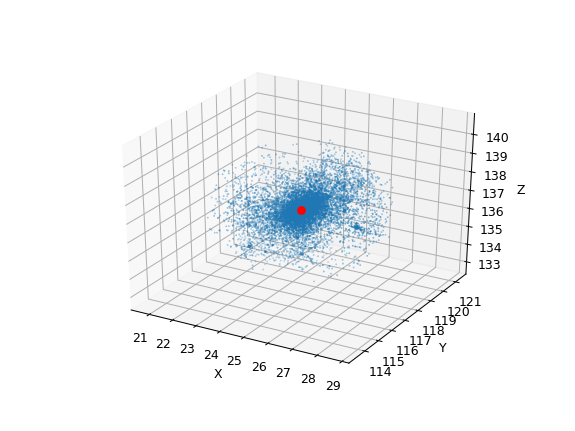

<IPython.core.display.Javascript object>


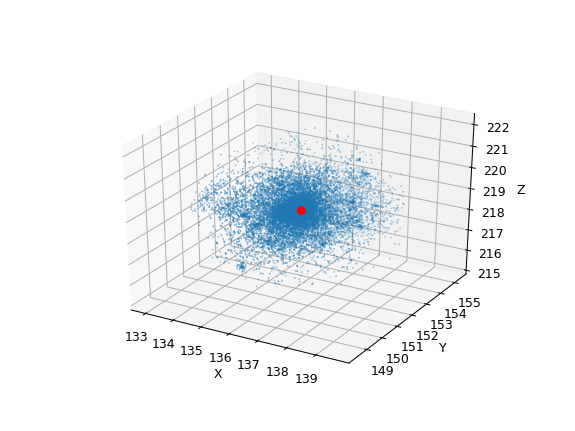

<IPython.core.display.Javascript object>


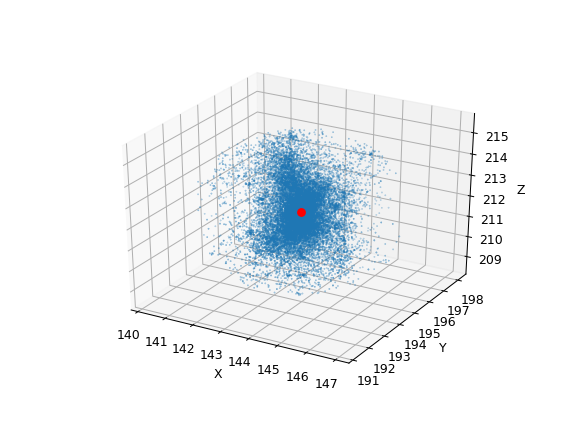

<IPython.core.display.Javascript object>


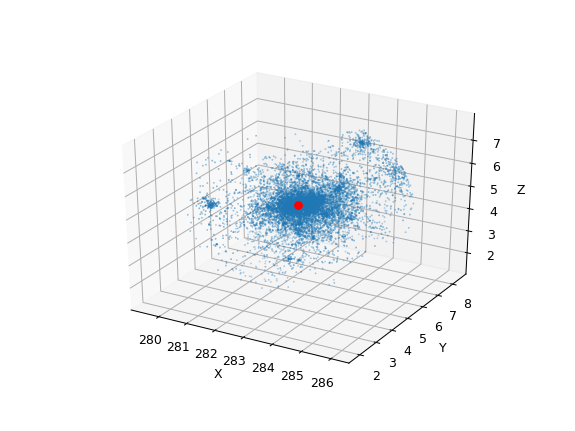

<IPython.core.display.Javascript object>


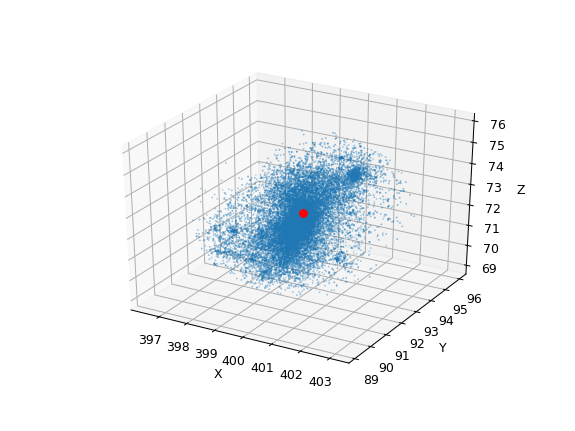

<IPython.core.display.Javascript object>


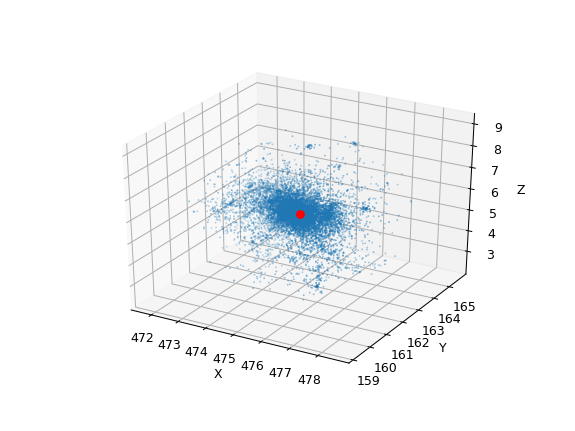

<IPython.core.display.Javascript object>


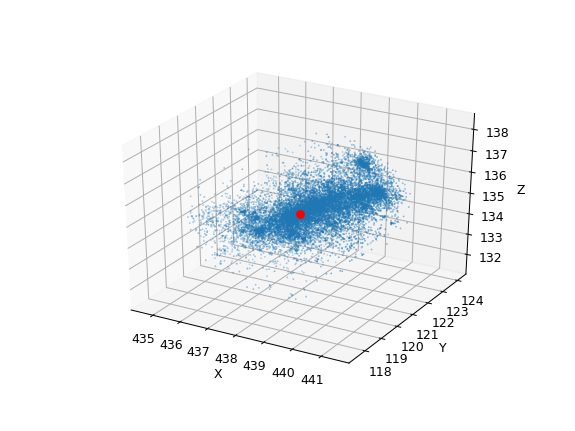

<IPython.core.display.Javascript object>


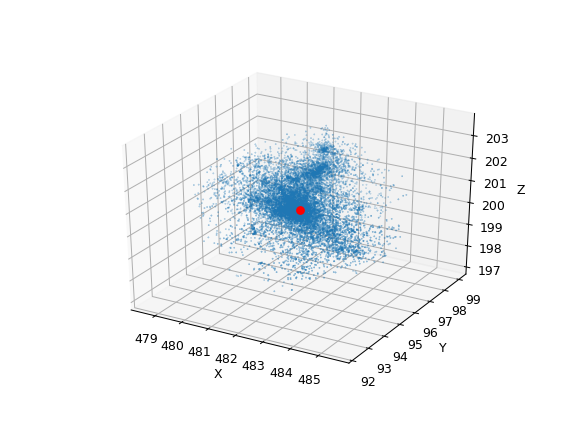

<IPython.core.display.Javascript object>


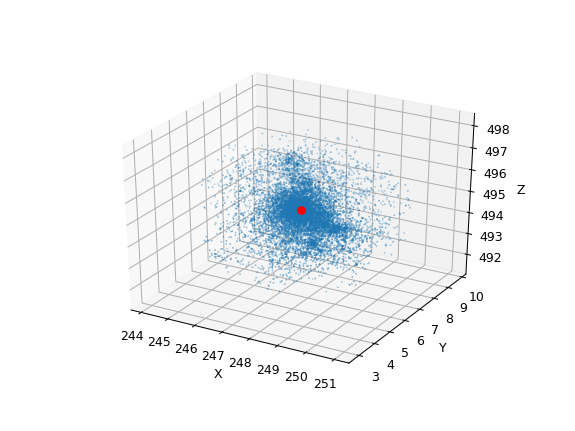

<IPython.core.display.Javascript object>


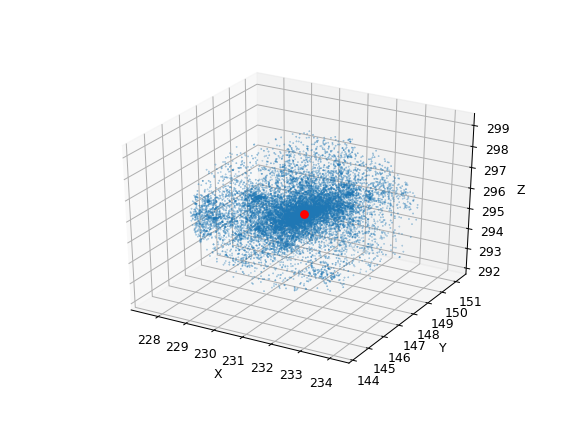

<IPython.core.display.Javascript object>


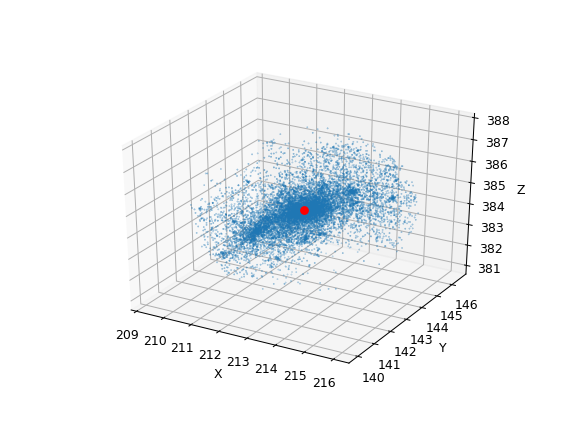

<IPython.core.display.Javascript object>


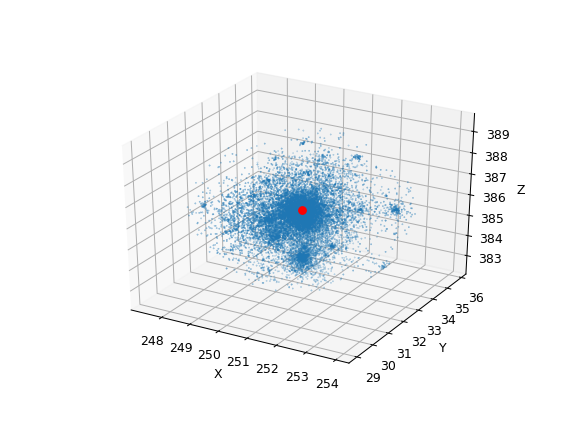

<IPython.core.display.Javascript object>


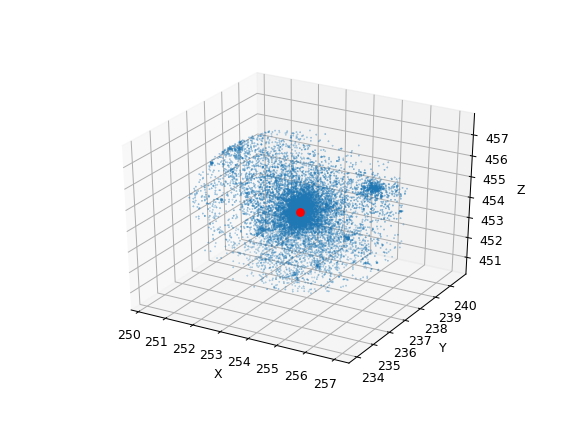

<IPython.core.display.Javascript object>


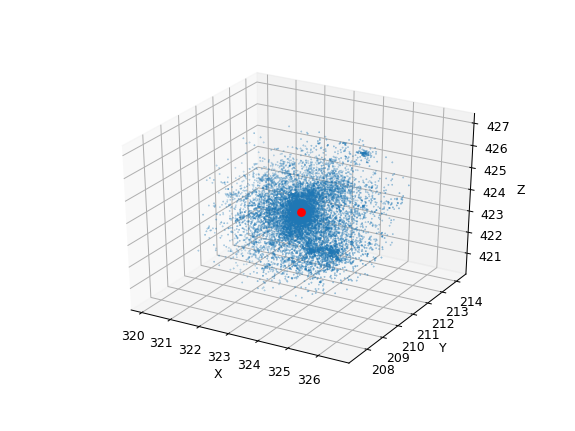

<IPython.core.display.Javascript object>


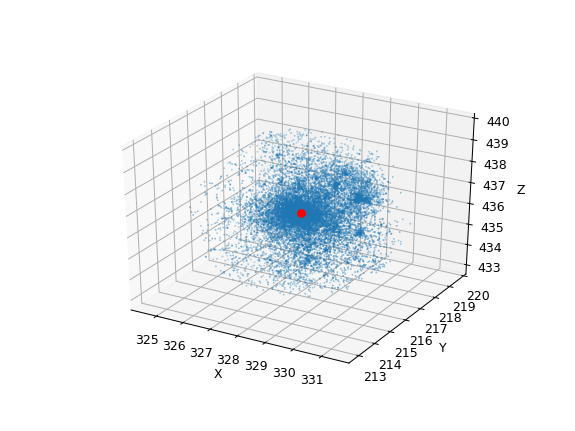

<IPython.core.display.Javascript object>


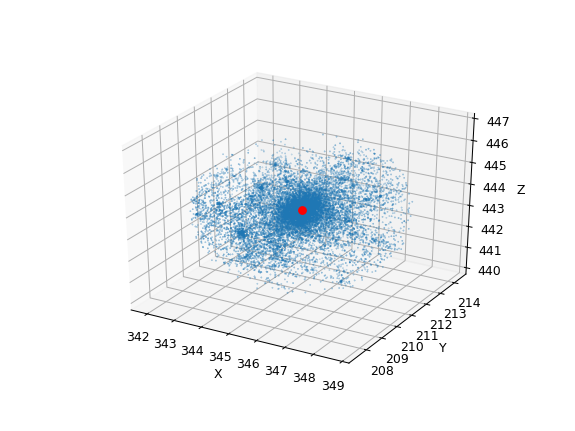

<IPython.core.display.Javascript object>


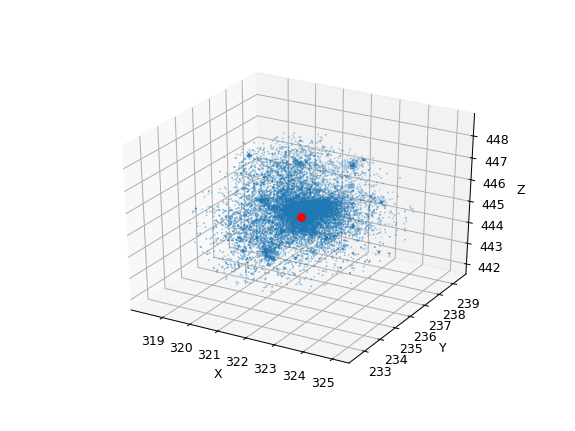

<IPython.core.display.Javascript object>


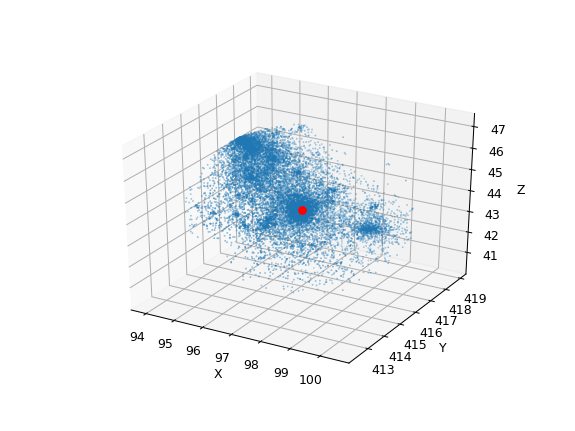

<IPython.core.display.Javascript object>


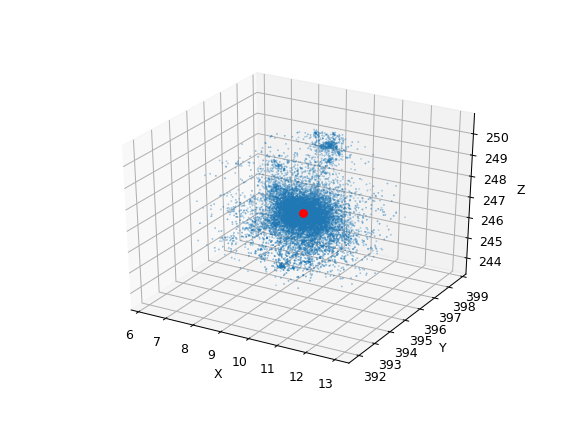

<IPython.core.display.Javascript object>


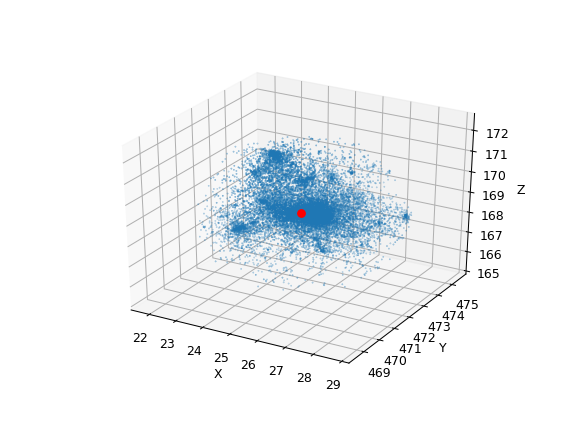

<IPython.core.display.Javascript object>


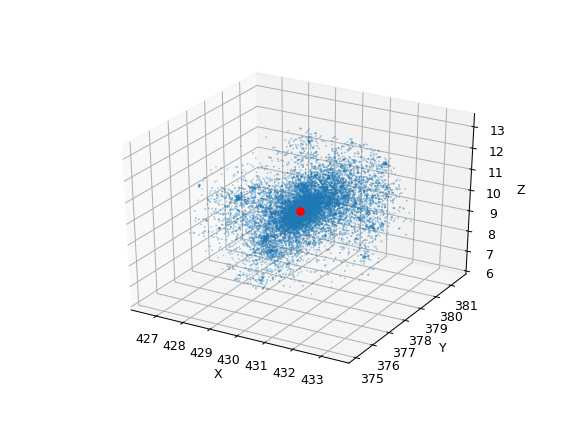

<IPython.core.display.Javascript object>


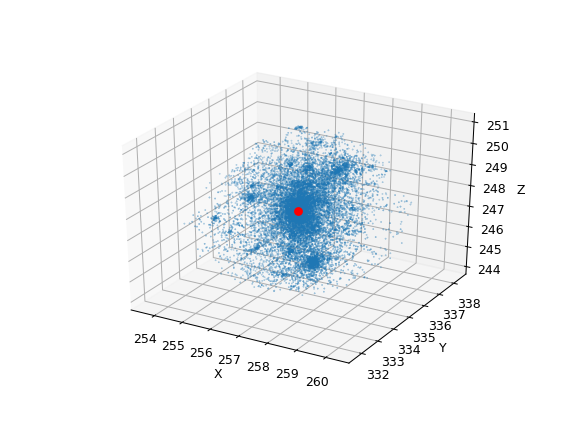

<IPython.core.display.Javascript object>


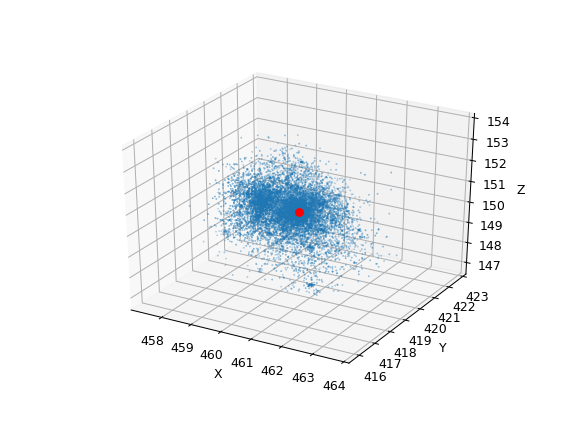

<IPython.core.display.Javascript object>


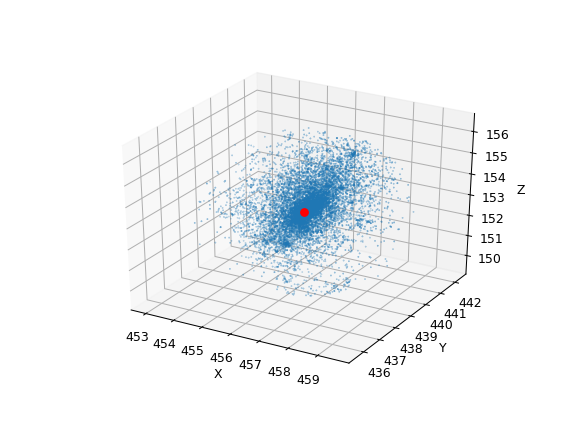

<IPython.core.display.Javascript object>


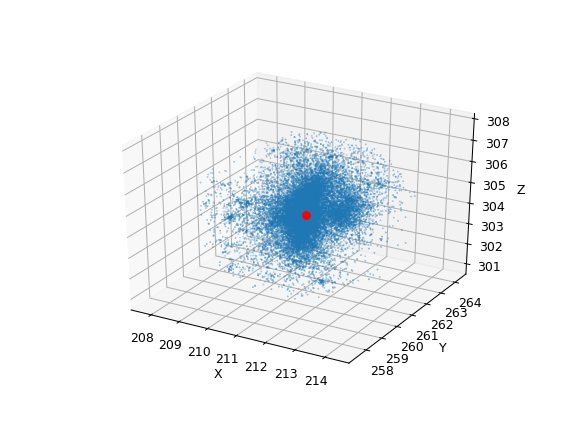

<IPython.core.display.Javascript object>


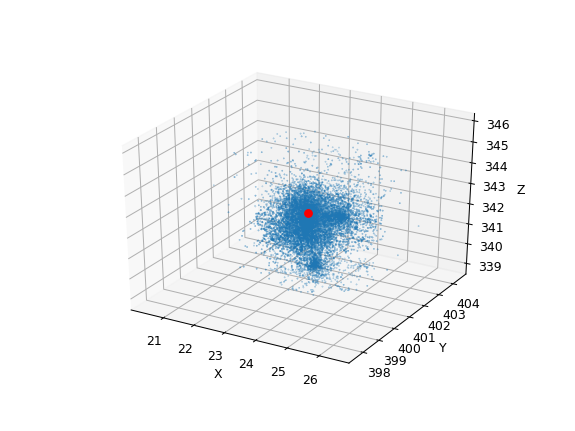

<IPython.core.display.Javascript object>


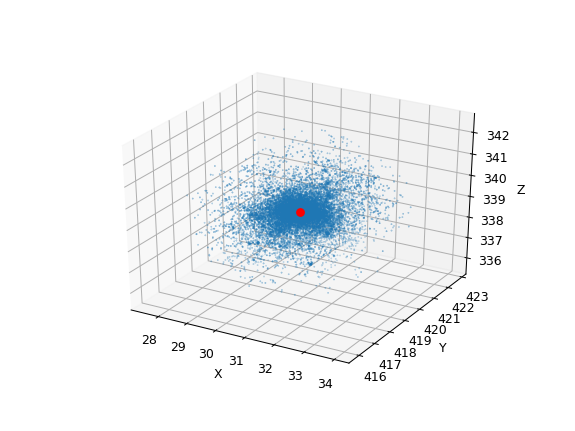

<IPython.core.display.Javascript object>


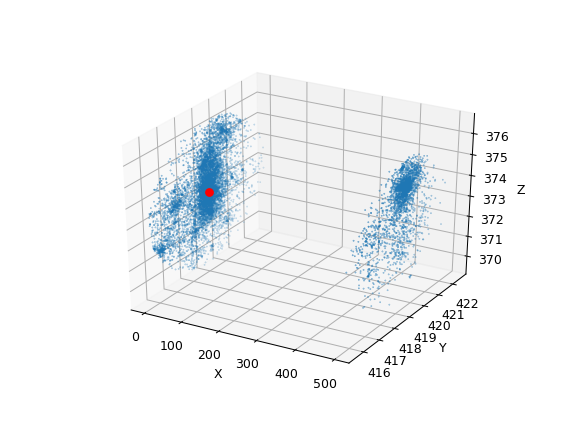

<IPython.core.display.Javascript object>


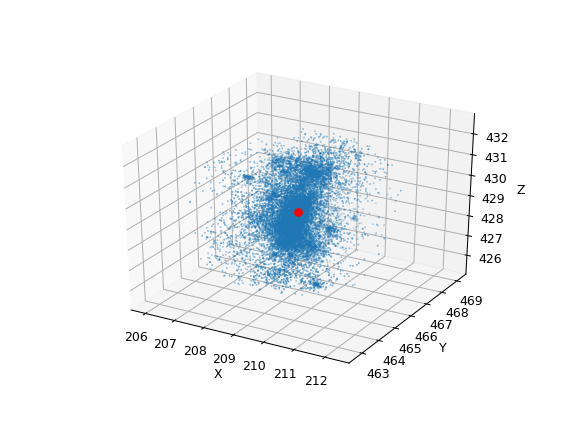

<IPython.core.display.Javascript object>


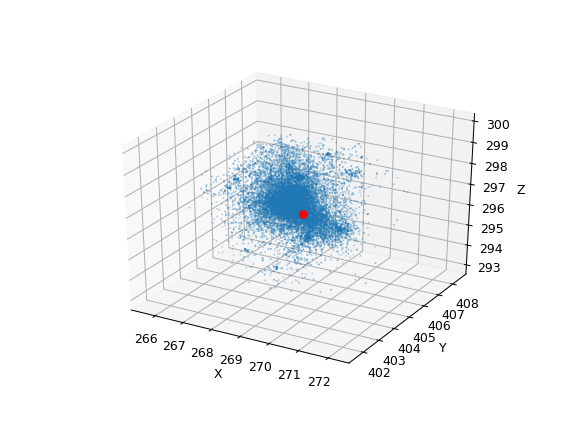

<IPython.core.display.Javascript object>


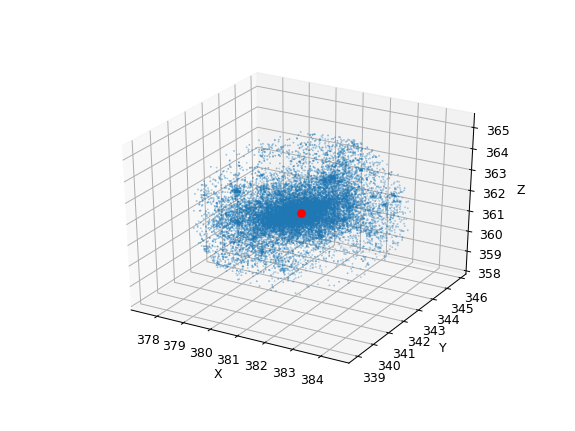

<IPython.core.display.Javascript object>


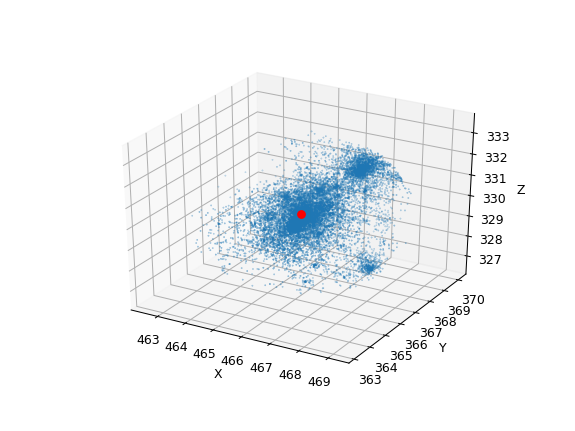

<IPython.core.display.Javascript object>


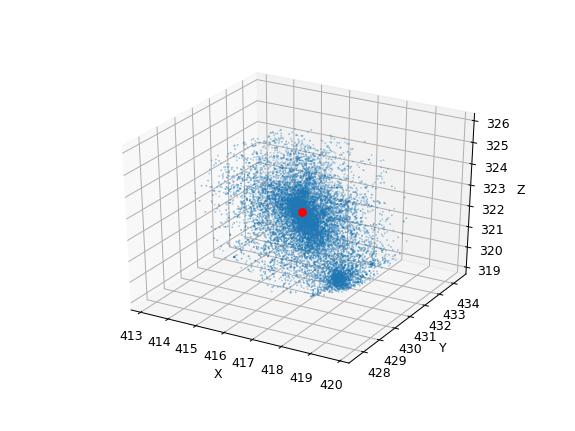

<IPython.core.display.Javascript object>


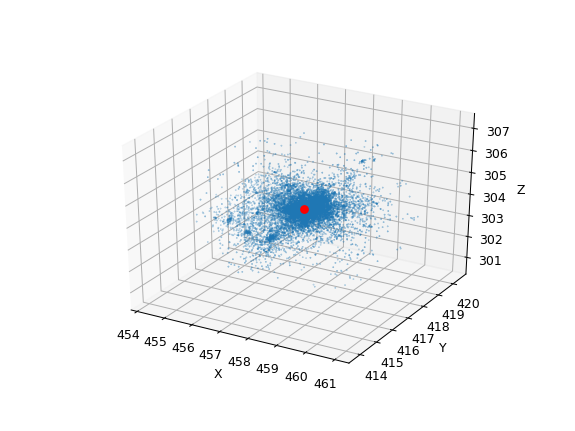

0

In [21]:
pos_visual(ptclpos,center)